# Objective

The aim here is to show how to perform fault diagnosis of a bearing based on accelerometer readings. The project demonstrates envelope spectrum analysis and perform kurtosis to diagnose the bearing faults.

Dataset Description - This dataset has been provided by MFPT and the original data source can be found at http://www.mfpt.org/FaultData/FaultData.htm .A bearing fault dataset has been provided to facilitate research into bearing analysis. The dataset comprises 7 sets of data. The first 4 sets of data come from a bearing test rig with: basline (good condition bearing), an outer race fault, outer race fault with various loads and inner race fault with various loads. The next 3 sets of data are from real-world faults, being from: an Oil pump bearing, Intermediate Speed bearing and a Planet bearing.

Each data set contains an acceleration signal "gs", sampling rate "sr", shaft speed "rate", load weight "load", and four critical frequencies representing different fault locations: ballpass frequency outer race (BPFO), ballpass frequency inner race (BPFI), fundamental train frequency (FTF), and ball spin frequency (BSF). 

Here the shaft speed is constant hence there is no need for pre-proceeing to remove shaft speed variations. When ever there are outter or inner race faults then corresponding BPFO,BPFI frequencys gets effected.

Lets plot the time domain data for Inner race faults and Outer race faults as well as base line data.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


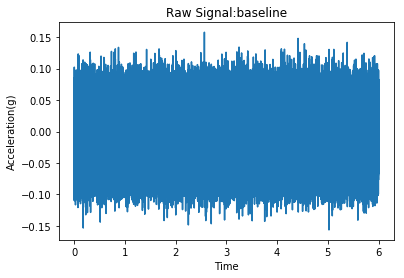

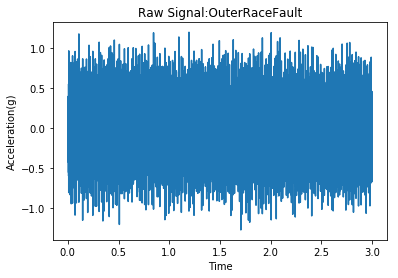

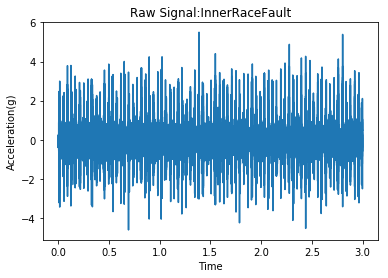

In [206]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot,figure,semilogy
from scipy import fft, arange
import glob
file = r'P:\Springboard\Capstone-2\data_out\*.mat'
import glob
legend =[]
data1=defaultdict(list)
for f in glob.glob(file):
    mdata = loadmat(f, mat_dtype=True)
    mdata = mdata['bearing']
    mdtype = mdata.dtype
    ndata = {n: (mdata[n][0, 0]) for n in mdtype.names}
    if (ndata['load']) == ['0']:
        vib_data=ndata['gs']
    else:
        vib_data=(ndata['gs']/float(ndata['load'][0]))


    Fs = ndata['sr']  # sampling rate
    Ts = 1.0/Fs; # sampling interval
    t = range(0,len(vib_data))/Fs # time vector


    y = vib_data


    plot(t.T,10*(y))
    xlabel('Time')
    ylabel('Acceleration(g)')
    title('Raw Signal:' + f[35:].split('_')[0])


    show()

Let's take a look at power spectrum of the raw signals

In [207]:
def plotSpectrum(y,Fs):
     """
     Plots a Single-Sided Amplitude Spectrum of y(t)
     """
     n = len(y) # length of the signal
     k = arange(n)
     T = n/Fs
     frq = k/T # two sides frequency range
     #frq = frq[range(n/2)] # one side frequency range

     Y = fft(y)/n # fft computing and normalization
     #Y = Y[range(n/2)]

     plot(frq.T[0:1000],np.log(abs(Y)**2)[0:1000],'r') # plotting the spectrum
     xlabel('Freq (Hz)')
     ylabel('|Y(freq)|')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log


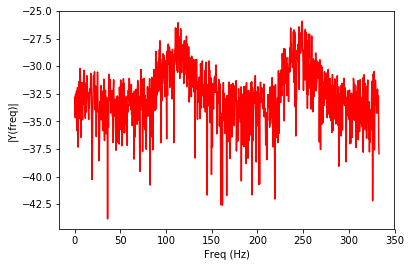

In [208]:
plotSpectrum(vib_data,ndata['sr'])
show()  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


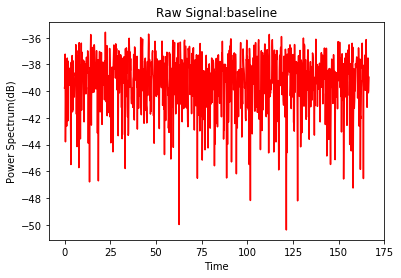

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log


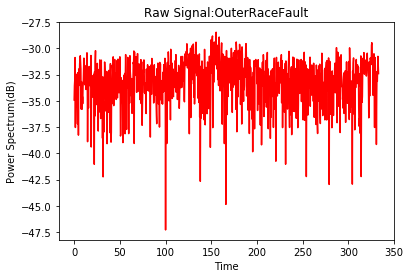

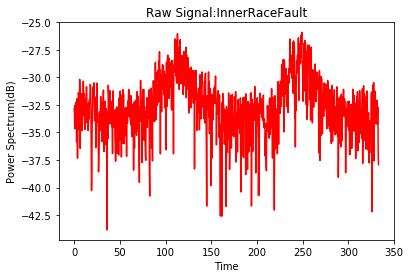

In [209]:
file = r'P:\Springboard\Capstone-2\data_out\*.mat'
l = []
for f in glob.glob(file):
    mdata = loadmat(f, mat_dtype=True)
    mdata = mdata['bearing']
    mdtype = mdata.dtype
    ndata = {n: (mdata[n][0, 0]) for n in mdtype.names}
    if (ndata['load']) == ['0']:
        vib_data=ndata['gs']
    else:
        vib_data=(ndata['gs']/float(ndata['load'][0]))
    Fs = ndata['sr']
    plotSpectrum(vib_data,ndata['sr'])
    xlabel('Time')
    ylabel('Power Spectrum(dB)')
    title('Raw Signal:' + f[35:].split('_')[0])
    show()  
    

Looking at the time domain data it is observed that amplitude of the raw signal is modeluated at a certain frquency.
For Inner race faults - (BPFI) - 	4.755 x (shaft speed) = 4.755*25 = 118.875Hz
For Outer race faults - (BPFO) - 	3.245 x (shaft speed) = 3.245*25 = 81.125Hz
For Normal bearing or a healty bearing - 14.8375Hz

In [30]:
from scipy.signal import hilbert

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


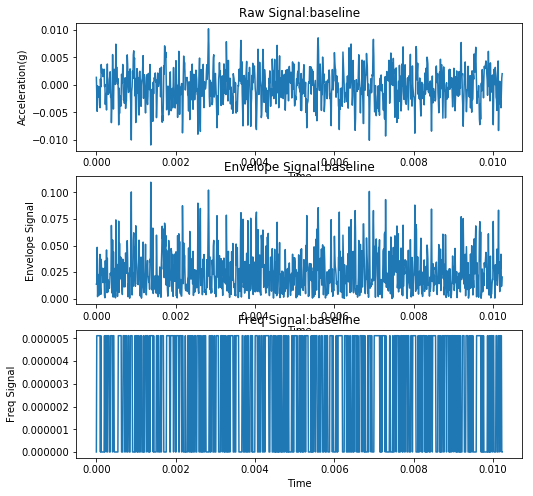

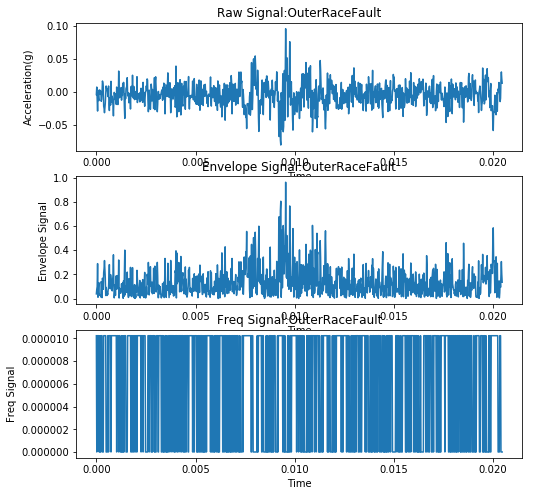

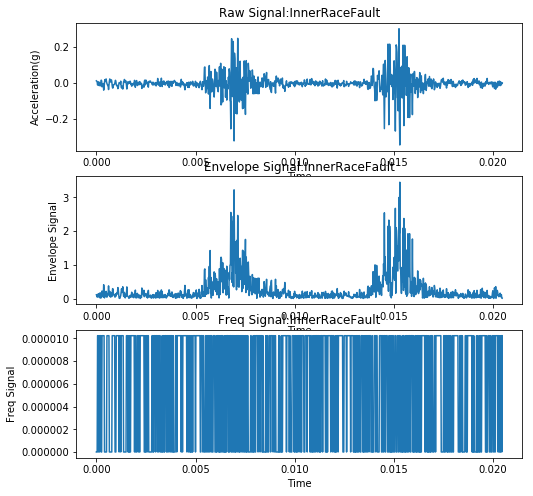

In [215]:
file = r'P:\Springboard\Capstone-2\data_out\*.mat'
l = []
for f in glob.glob(file):
    mdata = loadmat(f, mat_dtype=True)
    mdata = mdata['bearing']
    mdtype = mdata.dtype
    ndata = {n: (mdata[n][0, 0]) for n in mdtype.names}
    if (ndata['load']) == ['0']:
        vib_data=ndata['gs']
    else:
        vib_data=(ndata['gs']/float(ndata['load'][0]))
    y= vib_data
    n = len(y) # length of the signal
    k = arange(n)
    Fs = ndata['sr']
    T = n/Fs
    frq = k/T
    t = range(0,len(vib_data))/Fs 

    Y = fft(y)/n # fft computing and normalization
    envelope_hilbert = hilbert(vib_data)
    envelope = fft(envelope_hilbert)/len(envelope_hilbert)
    instantaneous_phase = np.unwrap(np.angle(envelope))
    instantaneous_frequency = ((instantaneous_phase)) /((2.0*np.pi) * Fs)
    
    figure(figsize=(8,8))
    subplot(3,1,1)
    plot(t.T[0:1000],(vib_data[0:1000]))
    
    xlabel('Time')
    ylabel('Acceleration(g)')
    title('Raw Signal:' + f[35:].split('_')[0])
    subplot(3,1,2)
    plot(t.T[0:1000],10*np.abs(envelope_hilbert)[0:1000])
    xlabel('Time')
    ylabel('Envelope Signal')
    title('Envelope Signal:' + f[35:].split('_')[0])
    subplot(3,1,3)
    plot(t.T[0:1000],(instantaneous_frequency)[0:1000])
    xlabel('Time')
    ylabel('Freq Signal')
    title('Freq Signal:' + f[35:].split('_')[0])
    
    show()

    

In the above plots,considering inner race faults the peaks can be seen at 0.006 and 0.015 sec. Converting to its frequncy it is 0.015-0.06 = 0.09sec
F = 1/T = 118.875Hz.

Let plot the same to show most of the energy is focused on BPFI harmonics.Plotting evelope spectrum and over harmonics

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


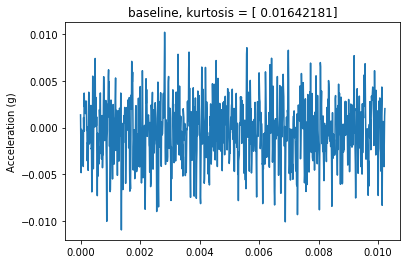

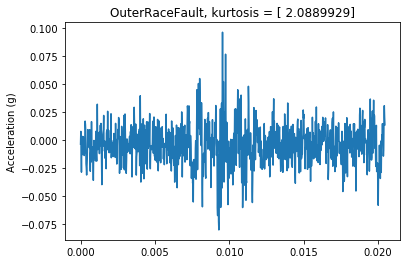

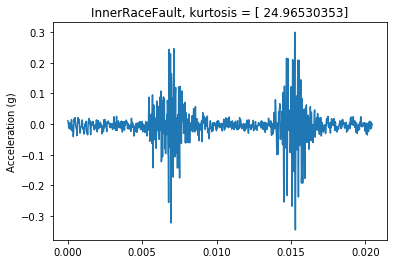

In [119]:
from scipy.stats import kurtosis,skew
file = r'P:\Springboard\Capstone-2\data_out\*.mat'
l = []

for f in glob.glob(file):
    mdata = loadmat(f, mat_dtype=True)
    mdata = mdata['bearing']
    mdtype = mdata.dtype
    ndata = {n: (mdata[n][0, 0]) for n in mdtype.names}
    if (ndata['load']) == ['0']:
        vib_data=ndata['gs']
    else:
        vib_data=(ndata['gs']/float(ndata['load'][0]))
    Fs = ndata['sr']
    
    T = n/Fs
    frq = k/T
    t = range(0,len(vib_data))/Fs 
    kurt = kurtosis(vib_data)
    plot(t.T[0:1000], vib_data[0:1000])
    ylabel('Acceleration (g)')
    title(f[35:].split('_')[0]+ ', kurtosis = '+ str(kurt))
    show()
    
    

It is shown that inner race fault signal has significantly larger impulsiveness, making envelope spectrum analysis capture the fault signature at BPFI effectively.
For an outer race fault signal, the amplitude modulation at BPFO is slightly noticeable, but it is masked by strong noise. The normal signal does not show any amplitude modulation. Extracting the impulsive signal with amplitude modulation at BPFO (or enhancing the signal-to-noise ratio) is a key preprocessing step before envelope spectrum analysis.
Using BandPass filter ,to filter noise in outerrace faults.

In [156]:
#By bandpass filtering the signal with the suggested center frequency and bandwidth,
#the kurtosis can be enhanced and the modulated amplitude of the outer race fault can be retrieved.
from scipy.signal import butter,lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [279]:
df =pd.DataFrame(columns = ['BPFIAmplitude','BPFOAmplitude','Fault'])
for f in glob.glob(file):
    i=0
    mdata = loadmat(f, mat_dtype=True)
    mdata = mdata['bearing']
    mdtype = mdata.dtype
    ndata = {n: (mdata[n][0, 0]) for n in mdtype.names}
    if (ndata['load']) == ['0']:
        vib_data=ndata['gs']
    else:
        vib_data=(ndata['gs']/float(ndata['load'][0]))
    y= vib_data
    n = len(y) # length of the signal
    k = arange(n)
    Fs = ndata['sr']
    T = n/Fs
    frq = k/T
    t = range(0,len(vib_data))/Fs 

    Y = fft(y)/n # fft
    frqz = freqz(Y)
    le = len(frq)/2
    bw = frqz[-1]- frqz[0]
    lowcut = 0.2
    highcut = 0.9
    b,a=butter_bandpass(lowcut, highcut, Fs, order=5)
    fEnvpBpf = butter_bandpass_filter(envelope, lowcut, highcut, Fs, order=5)
    deltaf = fEnvpBpf[2] - fEnvpBpf[1]
    analytic_signal = hilbert(vib_data)
    sp = np.abs(analytic_signal)
    
    fault=f[35:].split('_')[0]
    
    j=0
    from collections import defaultdict
    data={}
    for i in range(0,len(sp),int(len(sp)/5)):
        

        data['Feature'+str(j)]=(kurtosis(sp[i:i+int(len(sp)/5)]))
        data['Fault']=fault
        j+=1
        df = pd.DataFrame(data,columns=['Fault','Feature0','Feature1','Feature2','Feature3','Feature4','Feature5'])
        df.to_csv('Data.csv',mode='a')
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Here I classfied data as 
1-baseline or healthy bearing
2-Innerrace fault
3-Outerracefault

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
df = pd.read_csv('Data.csv')
X = df.iloc[:,1:]
y = df.iloc[:,0]
df1 = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [305]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [316]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.650


In [307]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[0 0 0]
 [1 2 0]
 [0 0 3]]


In [310]:
y_pred1 = logreg.predict([23.11886595,22.45253488,28.14657228,27.84950045,26.73292985,-1.938466639])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [311]:
y_pred1

array([2], dtype=int64)

The above prediction 2  - Innerracefault which is expected.

Conclusion 

The fault diagnosis using envelope spectrum analyis and kurtosis gives a good distinction in the data to classify bearing if it is healthy,or if it has any innerrace faults or outerrace faults. Logistic regression with 83% accuracy gives correct predictions for this data set.